In [22]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [23]:
# create state
class quaderatic_equation(TypedDict):

    a : int
    b : int
    c : int

    equation : str
    discriminant : float
    result : str

In [24]:
# create graph
graph = StateGraph(quaderatic_equation)

In [25]:
def show_equation(state : quaderatic_equation) -> quaderatic_equation:

    equation = f'{state["a"]} x 2 {state["b"]} x {state["c"]}'

    return {'equation':equation}

def calculate_equation(state : quaderatic_equation) -> quaderatic_equation:

    discriminant = state['b']**2 - (4*state['a']*state['c'])

    return {'discriminant' : discriminant}

def real_roots(state : quaderatic_equation) -> quaderatic_equation:
    
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])

    result = f'The roots are {root1} and {root2}'

    return {'result':result}

def repeated_roots(state : quaderatic_equation) -> quaderatic_equation:

    root = (-state['b'])/(2*state['a'])

    result = f'Only repeating root is {root}'

    return {'result':result}

def noroots(state : quaderatic_equation) -> quaderatic_equation:

    result = f'No real roots'

    return {'result':result}

def check_condition(state : quaderatic_equation) -> Literal['real_roots', 'repeated_roots', 'noroots']:

    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'noroots' 


In [26]:
# add nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_equation', calculate_equation)
graph.add_node('noroots', noroots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('real_roots', real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_equation')
graph.add_conditional_edges('calculate_equation', check_condition)
graph.add_edge('noroots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('real_roots', END)

# compile graph
workflow = graph.compile()


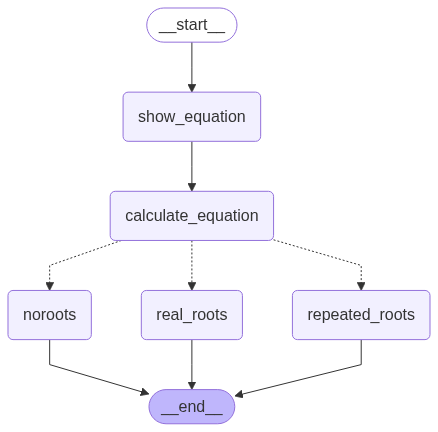

In [27]:
workflow

In [28]:
# execute the workflow
initial_state = {'a':4, 'b':2, 'c':4}
final_output = workflow.invoke(initial_state)
print(final_output)

{'a': 4, 'b': 2, 'c': 4, 'equation': '4 x 2 2 x 4', 'discriminant': -60, 'result': 'No real roots'}
